# Classifying Moller Events

In quantum field theory, electron-electron scattering is known as Moller scattering.

## Data Set

* Signal: mollers
* Background: beam-bkg

# Preprocessing Signal Monte Carlo Files


# Signal Plots

In [5]:
# This allows matplotlib plots to be shown inline
%matplotlib inline

# 
import numpy as np
import root_numpy as rnp
import matplotlib.pyplot as plt

# Open a ROOT file and create a record array out of the ROOT tree
X_rec = rnp.root2array("mollers_preprocessed_signal.root")

# Convert the data into an array so it can be used by scikit-learn
X_sig = rnp.rec2array(X_rec)
#print X_sig
print len(X_sig)
print X_sig.shape

# Create the data labels
y_sig = np.ones(len(X_sig))

16191
(16191, 26)


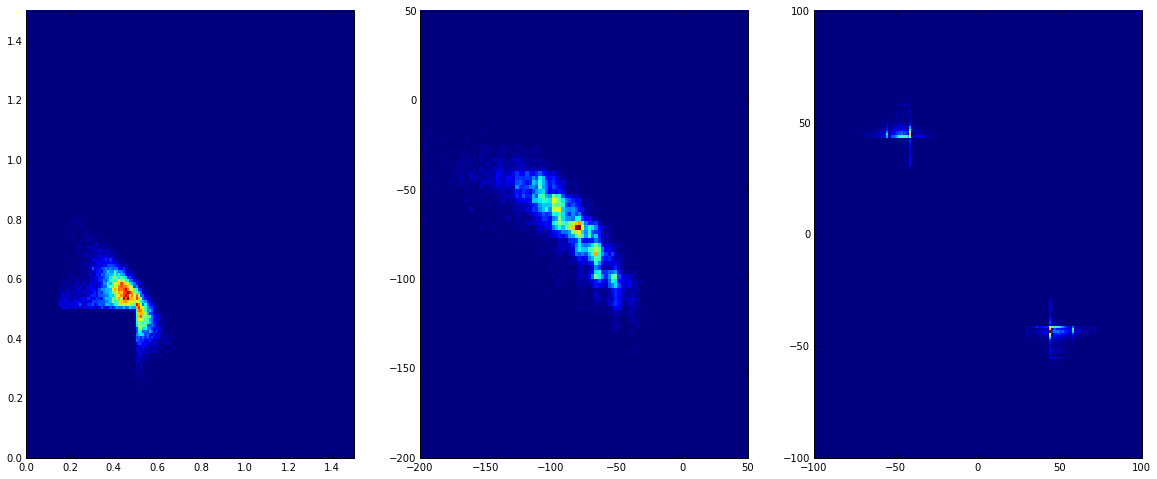

In [6]:
# Plot the energy of the highest energy cluster in the event
cluster_0_energy = X_rec['cluster_0_energy']
cluster_1_energy = X_rec['cluster_1_energy']
cluster_0_x = X_rec['cluster_0_x']
cluster_1_x = X_rec['cluster_1_x']
cluster_0_y = X_rec['cluster_0_y']
cluster_1_y = X_rec['cluster_1_y']

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,8))
im = ax0.hist2d(cluster_0_energy, cluster_1_energy, bins=150, range=[[0, 1.5], [0, 1.5]])
ax1.hist2d(cluster_0_x, cluster_1_x, bins=100, range=[[-200, 50], [-200, 50]]);
ax2.hist2d(cluster_0_y, cluster_1_y, bins=200, range=[[-100, 100], [-100, 100]]);


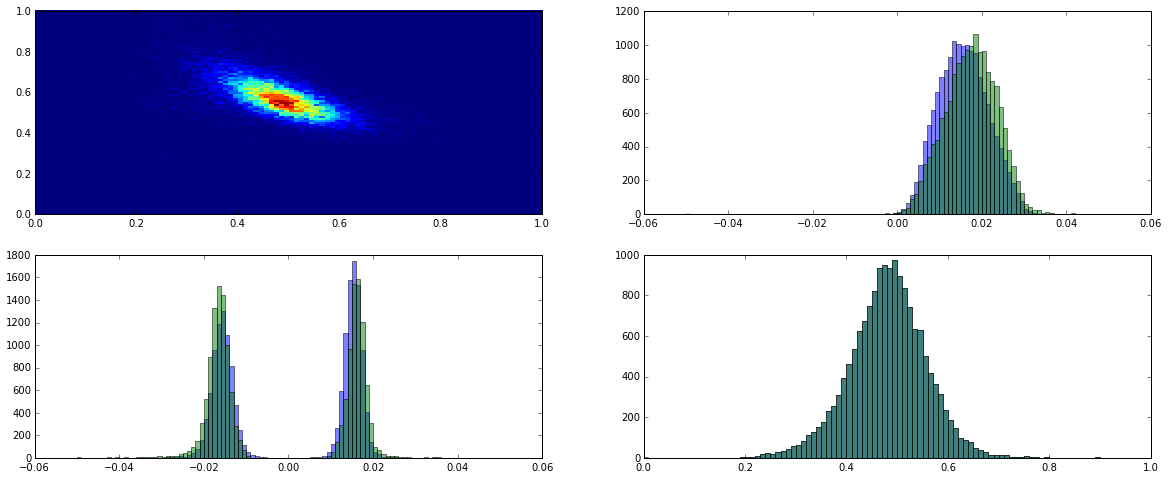

In [7]:
track_0_p = X_rec['track_0_p']
track_0_px = X_rec['track_0_px']
track_0_py = X_rec['track_0_py']
track_0_pz = X_rec['track_0_pz']
track_1_p = X_rec['track_1_p']
track_1_px = X_rec['track_1_px']
track_1_py = X_rec['track_1_py']
track_1_pz = X_rec['track_1_pz']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,8))
ax0, ax1, ax2, ax3 = axes.flat
colors = ['red', 'blue']
ax0.hist2d(track_0_p, track_1_p, bins=100, range=[[0, 1], [0, 1]])
ax1.hist(track_0_px, bins=100, range=(-0.05, 0.05), alpha=0.5)
ax1.hist(track_1_px, bins=100, range=(-0.05, 0.05), alpha=0.5)
ax2.hist(track_0_py, bins=100, range=(-0.05, 0.05), alpha=0.5)
ax2.hist(track_1_py, bins=100, range=(-0.05, 0.05), alpha=0.5)
ax3.hist(track_0_pz, bins=100, range=(0, 1.), alpha=0.5);
ax3.hist(track_0_pz, bins=100, range=(0, 1.), alpha=0.5);

# Preprocessing Background Monte Carlo Files

The beam-tri background that will be used in training the classifier will be preprocessed in a manner similar to the pure Moller signal sample described above.  However, because a beam-tri sample without Mollers does not exist, it will also be required that the energy of one of the clusters in a pair have an energy greater than 0.8 GeV. This assures that only background events are being tagged as such.

# Background

In [8]:
# Open a ROOT file and create a record array out of the ROOT tree
X_bkg_rec = rnp.root2array("beam_tri_preprocessed_signal.root")

# Convert the data into an array so it can be used by scikit-learn
X_bkg = rnp.rec2array(X_bkg_rec)
print len(X_bkg)
print X_bkg.shape

# Create the data labels
y_bkg = np.zeros(len(X_bkg))

17728
(17728, 26)


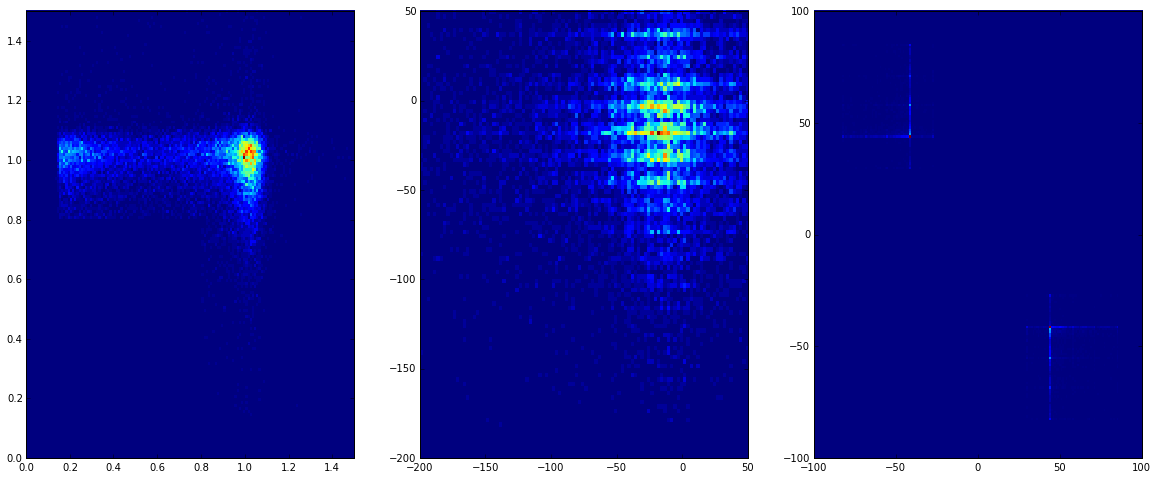

In [132]:
# Plot the energy of the highest energy cluster in the event
cluster_0_energy = X_bkg_rec['cluster_0_energy']
cluster_1_energy = X_bkg_rec['cluster_1_energy']
cluster_0_x = X_bkg_rec['cluster_0_x']
cluster_1_x = X_bkg_rec['cluster_1_x']
cluster_0_y = X_bkg_rec['cluster_0_y']
cluster_1_y = X_bkg_rec['cluster_1_y']

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,8))
im = ax0.hist2d(cluster_0_energy, cluster_1_energy, bins=150, range=[[0, 1.5], [0, 1.5]])
ax1.hist2d(cluster_0_x, cluster_1_x, bins=100, range=[[-200, 50], [-200, 50]]);
ax2.hist2d(cluster_0_y, cluster_1_y, bins=200, range=[[-100, 100], [-100, 100]]);

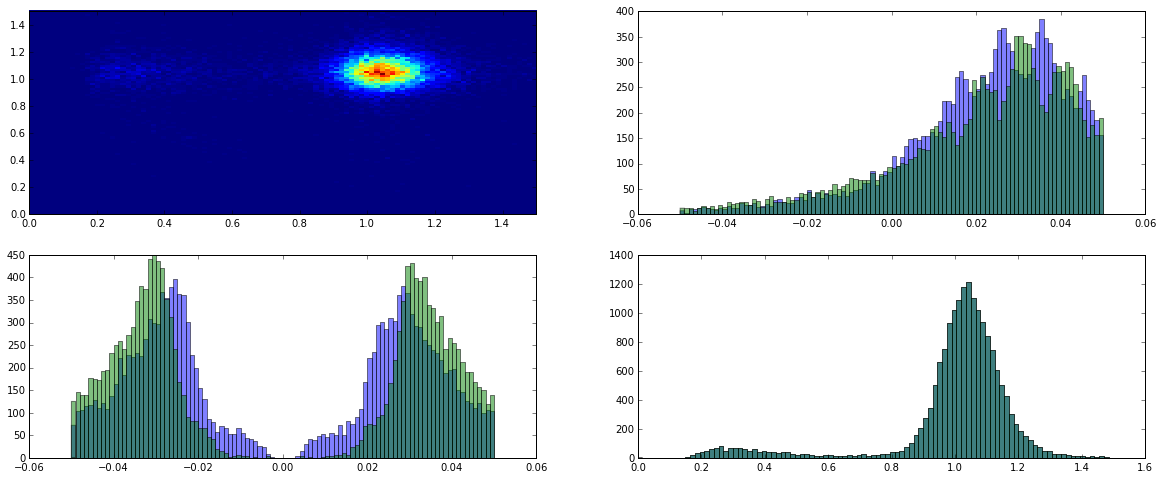

In [9]:
track_0_p = X_bkg_rec['track_0_p']
track_0_px = X_bkg_rec['track_0_px']
track_0_py = X_bkg_rec['track_0_py']
track_0_pz = X_bkg_rec['track_0_pz']
track_1_p = X_bkg_rec['track_1_p']
track_1_px = X_bkg_rec['track_1_px']
track_1_py = X_bkg_rec['track_1_py']
track_1_pz = X_bkg_rec['track_1_pz']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,8))
ax0, ax1, ax2, ax3 = axes.flat
colors = ['red', 'blue']
ax0.hist2d(track_0_p, track_1_p, bins=100, range=[[0, 1.5], [0, 1.5]])
ax1.hist(track_0_px, bins=100, range=(-0.05, 0.05), alpha=0.5)
ax1.hist(track_1_px, bins=100, range=(-0.05, 0.05), alpha=0.5)
ax2.hist(track_0_py, bins=100, range=(-0.05, 0.05), alpha=0.5)
ax2.hist(track_1_py, bins=100, range=(-0.05, 0.05), alpha=0.5)
ax3.hist(track_0_pz, bins=100, range=(0, 1.5), alpha=0.5);
ax3.hist(track_0_pz, bins=100, range=(0, 1.5), alpha=0.5);

# Decision Tree

In [10]:
X_sig_zip = zip(X_sig, y_sig)
X_bkg_zip = zip(X_bkg, y_bkg)

X_merge = np.concatenate((X_sig_zip, X_bkg_zip))

np.random.shuffle(X_merge)

X_list, y_list = map(list, zip(*X_merge))
X = np.array(X_list)
print X.shape
y = np.array(y_list)
print y.shape

(33919, 26)
(33919,)


In [136]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
print x_min
print x_max
print y_min
print y_max

-0.360506564379
3.24973368645
-0.351060017943
3.90874481201


In [11]:
from sklearn import tree

In [12]:
tree_clf = tree.DecisionTreeClassifier(max_depth=None)

In [13]:
from sklearn.cross_validation import cross_val_score

score = cross_val_score(tree_clf, X, y, cv=20)

In [14]:
print score.mean()

0.999410446705


In [15]:
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [16]:
import ROOT as r

# Open a ROOT file and create a record array out of the ROOT tree
X_5772_rec = rnp.root2array("5772_preprocessed_signal.root")

# Convert the data into an array so it can be used by scikit-learn
X_5772 = rnp.rec2array(X_5772_rec)

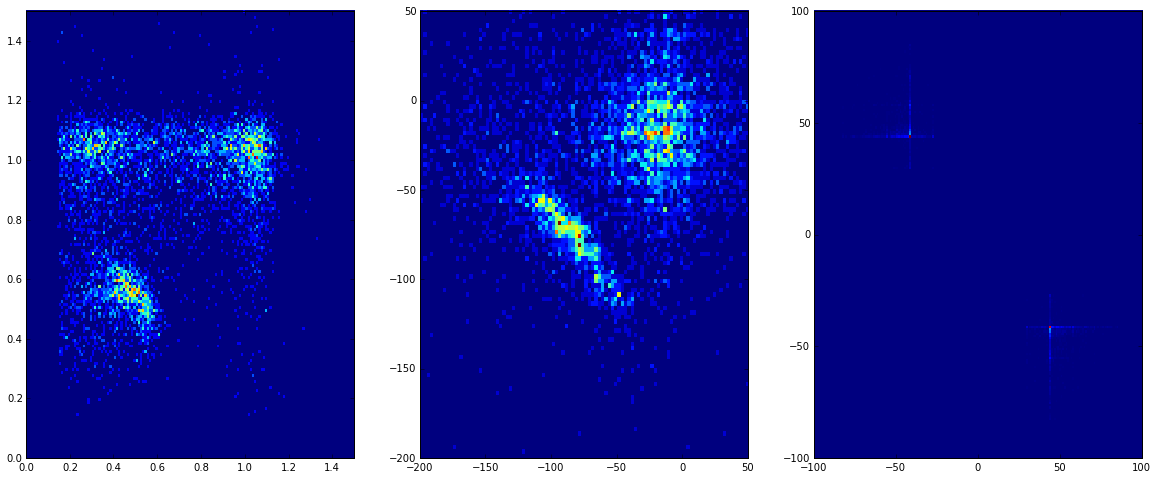

In [17]:
# Plot the energy of the highest energy cluster in the event
cluster_0_energy = X_5772_rec['cluster_0_energy']
cluster_1_energy = X_5772_rec['cluster_1_energy']
cluster_0_x = X_5772_rec['cluster_0_x']
cluster_1_x = X_5772_rec['cluster_1_x']
cluster_0_y = X_5772_rec['cluster_0_y']
cluster_1_y = X_5772_rec['cluster_1_y']

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,8))
ax0.hist2d(cluster_0_energy, cluster_1_energy, bins=150, range=[[0, 1.5], [0, 1.5]])
ax1.hist2d(cluster_0_x, cluster_1_x, bins=100, range=[[-200, 50], [-200, 50]]);
ax2.hist2d(cluster_0_y, cluster_1_y, bins=200, range=[[-100, 100], [-100, 100]]);

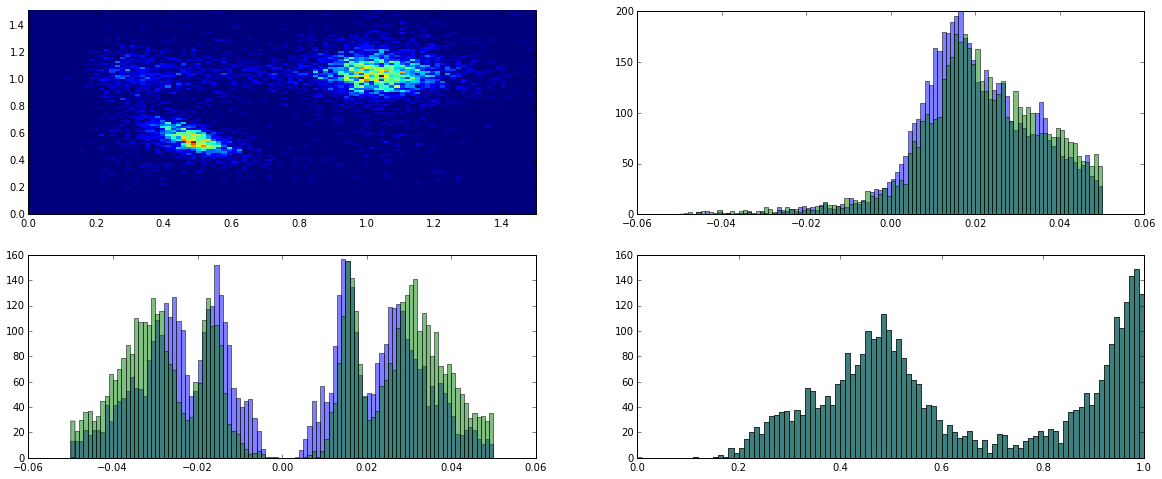

In [18]:
track_0_p = X_5772_rec['track_0_p']
track_0_px = X_5772_rec['track_0_px']
track_0_py = X_5772_rec['track_0_py']
track_0_pz = X_5772_rec['track_0_pz']
track_1_p = X_5772_rec['track_1_p']
track_1_px = X_5772_rec['track_1_px']
track_1_py = X_5772_rec['track_1_py']
track_1_pz = X_5772_rec['track_1_pz']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,8))
ax0, ax1, ax2, ax3 = axes.flat
colors = ['red', 'blue']
ax0.hist2d(track_0_p, track_1_p, bins=100, range=[[0, 1.5], [0, 1.5]])
ax1.hist(track_0_px, bins=100, range=(-0.05, 0.05), alpha=0.5)
ax1.hist(track_1_px, bins=100, range=(-0.05, 0.05), alpha=0.5)
ax2.hist(track_0_py, bins=100, range=(-0.05, 0.05), alpha=0.5)
ax2.hist(track_1_py, bins=100, range=(-0.05, 0.05), alpha=0.5)
ax3.hist(track_0_pz, bins=100, range=(0, 1.), alpha=0.5);
ax3.hist(track_0_pz, bins=100, range=(0, 1.), alpha=0.5);

(6025, 26)
6025
6025
(6025,)
[ 0.  0.  1. ...,  0.  0.  0.]


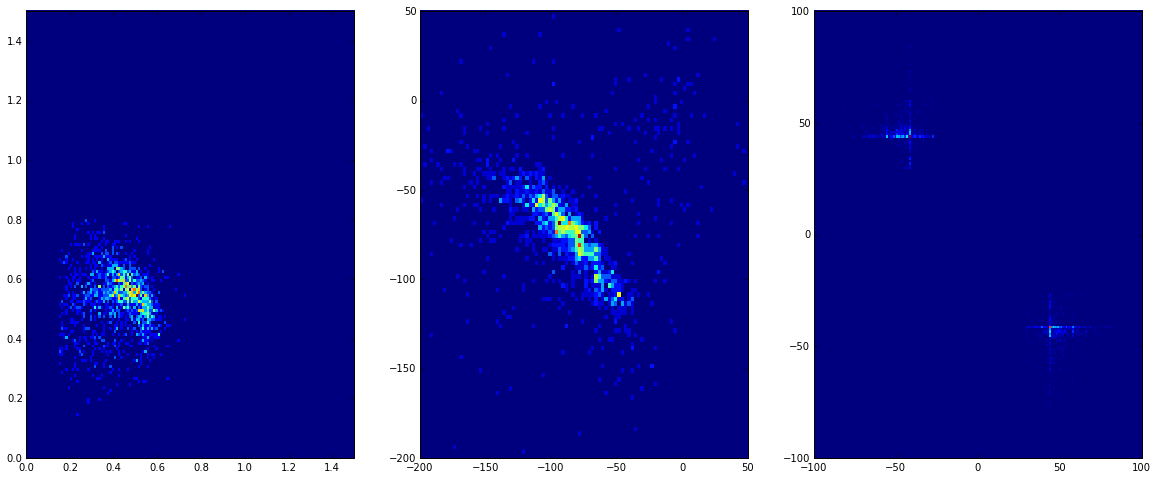

In [148]:
decision = tree_clf.predict(X_5772)
print X_5772.shape

print len(X_5772)
print len(decision)
print decision.shape
print decision

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,8))
ax0.hist2d(cluster_0_energy, cluster_1_energy, bins=150, range=[[0, 1.5], [0, 1.5]], weights=decision)
ax1.hist2d(cluster_0_x, cluster_1_x, bins=100, range=[[-200, 50], [-200, 50]], weights=decision);
ax2.hist2d(cluster_0_y, cluster_1_y, bins=200, range=[[-100, 100], [-100, 100]], weights=decision);

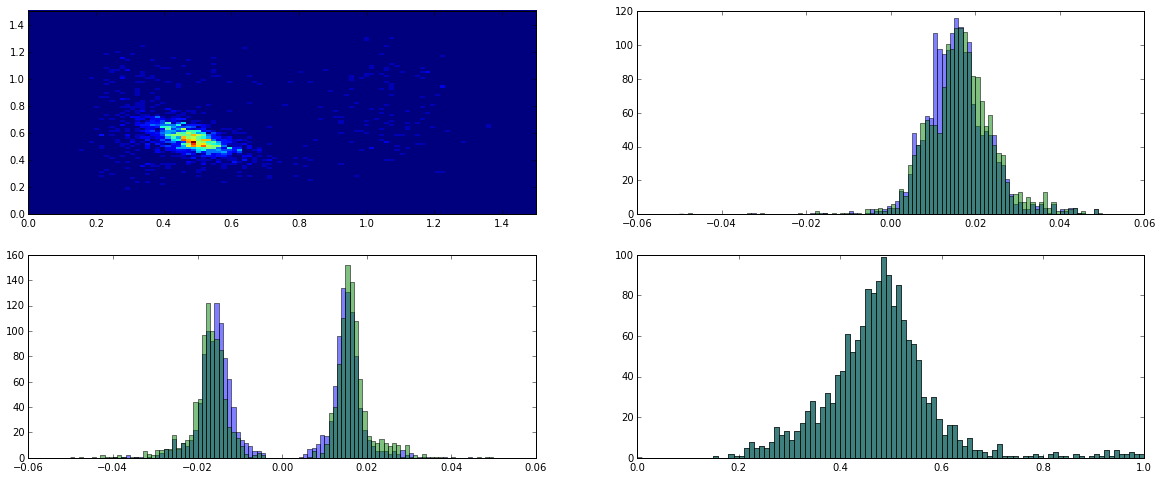

In [154]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,8))
ax0, ax1, ax2, ax3 = axes.flat
colors = ['red', 'blue']
ax0.hist2d(track_0_p, track_1_p, bins=100, range=[[0, 1.5], [0, 1.5]], weights=decision)
ax1.hist(track_0_px, bins=100, range=(-0.05, 0.05), alpha=0.5, weights=decision)
ax1.hist(track_1_px, bins=100, range=(-0.05, 0.05), alpha=0.5, weights=decision)
ax2.hist(track_0_py, bins=100, range=(-0.05, 0.05), alpha=0.5, weights=decision)
ax2.hist(track_1_py, bins=100, range=(-0.05, 0.05), alpha=0.5, weights=decision)
ax3.hist(track_0_pz, bins=100, range=(0, 1.), alpha=0.5, weights=decision);
ax3.hist(track_0_pz, bins=100, range=(0, 1.), alpha=0.5, weights=decision);

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
forest_clf = RandomForestClassifier(n_estimators=10)

In [21]:
score = cross_val_score(forest_clf, X, y, cv=20)

In [22]:
score.mean()

0.99941037719450221

In [160]:
importances = forest_clf.feature_importances_
#std = np.std([importances for tree in forest_clf.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]
print importances
plt.bar(range(len(importances)), importances[indices],
       color="r", yerr=0, align="center")

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [161]:
forest_clf.fit(X, y)

importances = forest_clf.feature_importances_
#std = np.std([importances for tree in forest_clf.estimators_],
#             axis=0)
#indices = np.argsort(importances)[::-1]
print importances
plt.bar(range(len(importances)), importances[indices],
       color="r", yerr=std[indices], align="center")

[  4.48099633e-04   1.69669516e-02   6.02193943e-02   5.56601264e-02
   1.42307293e-04   1.05003708e-04   1.16102224e-01   3.52466165e-02
   2.23128437e-04   8.56975060e-02   2.12389635e-04   1.48731815e-04
   3.17727876e-03   1.82382232e-04   1.63609096e-04   0.00000000e+00
   3.11010686e-01   6.95767691e-04   7.19963934e-05   9.66757557e-02
   2.80461851e-04   5.06517636e-05   2.13350219e-01   1.51327812e-03
   1.65543435e-03   0.00000000e+00]


NameError: name 'std' is not defined

In [24]:
forest_clf.fit(X, y)
decision = forest_clf.predict(X_5772)
print decision

[ 0.  0.  1. ...,  0.  0.  0.]


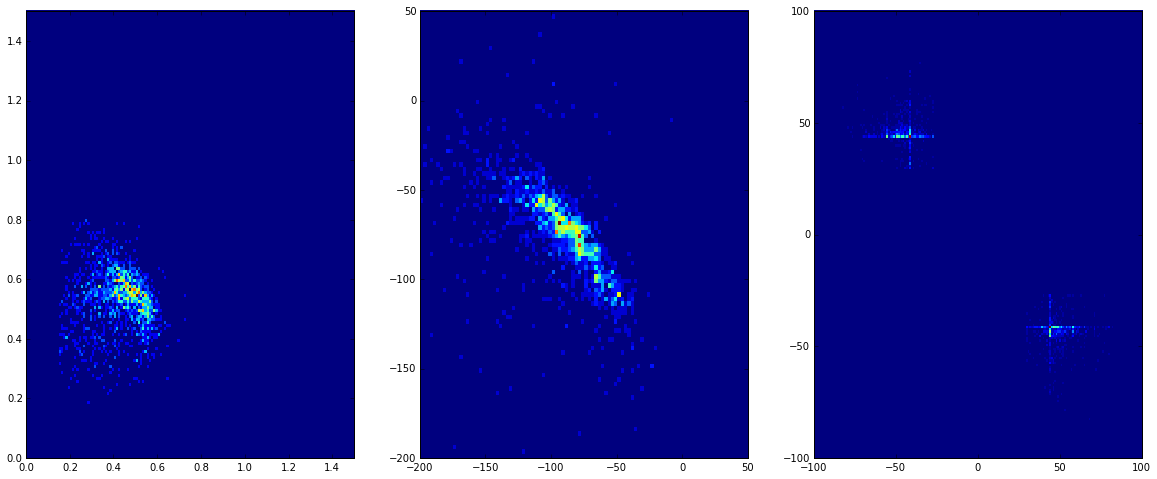

In [26]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,8))
ax0.hist2d(cluster_0_energy, cluster_1_energy, bins=150, range=[[0, 1.5], [0, 1.5]], weights=decision)
ax1.hist2d(cluster_0_x, cluster_1_x, bins=100, range=[[-200, 50], [-200, 50]], weights=decision);
ax2.hist2d(cluster_0_y, cluster_1_y, bins=200, range=[[-100, 100], [-100, 100]], weights=decision);

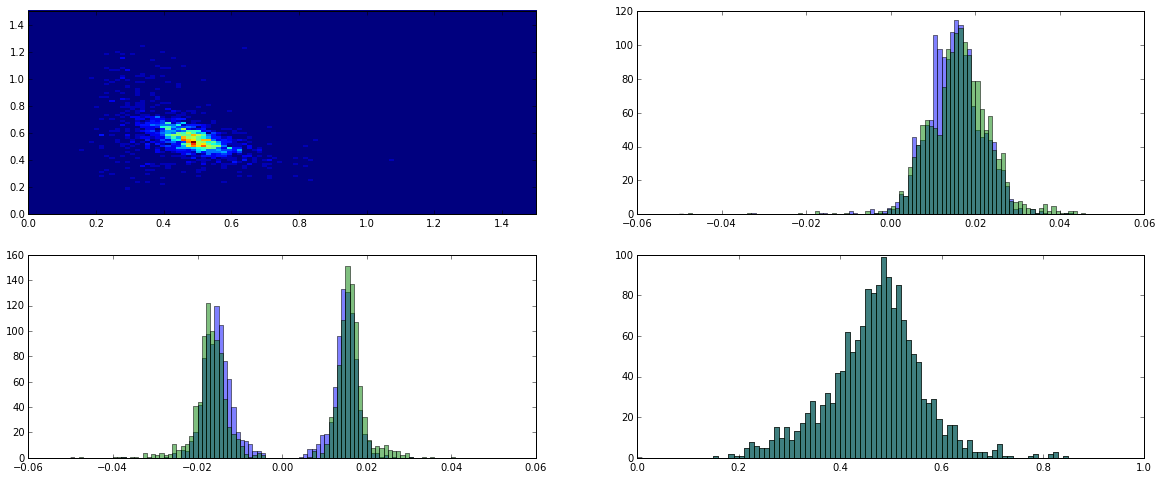

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,8))
ax0, ax1, ax2, ax3 = axes.flat
colors = ['red', 'blue']
ax0.hist2d(track_0_p, track_1_p, bins=100, range=[[0, 1.5], [0, 1.5]], weights=decision)
ax1.hist(track_0_px, bins=100, range=(-0.05, 0.05), alpha=0.5, weights=decision)
ax1.hist(track_1_px, bins=100, range=(-0.05, 0.05), alpha=0.5, weights=decision)
ax2.hist(track_0_py, bins=100, range=(-0.05, 0.05), alpha=0.5, weights=decision)
ax2.hist(track_1_py, bins=100, range=(-0.05, 0.05), alpha=0.5, weights=decision)
ax3.hist(track_0_pz, bins=100, range=(0, 1.), alpha=0.5, weights=decision);
ax3.hist(track_0_pz, bins=100, range=(0, 1.), alpha=0.5, weights=decision);

In [ ]:
electron_mass = 0.000510998928

for x_value in X_5772 : 
    energy_0 = track_1_p*track_2_p

# AdaBoost

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
ada_clf = AdaBoostClassifier(n_estimators=100)

In [30]:
scores = cross_val_score(ada_clf, X, y, cv=20)

In [ ]:
scores.mean()

In [53]:
ada_clf.fit(X, y)
decision = ada_clf.predict(X_5772)
print decision

[ 0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  1.]
